In [1]:
'''
Name   : Rupesh Garsondiya
github : @Rupeshgarsondiya
Topic  : Batch Normalization in deep-learning(DL)
'''

'\nName   : Rupesh Garsondiya\ngithub : @Rupeshgarsondiya\nTopic  : Batch Normalization in deep-learning(DL)\n'

# Batch Normalization in Deep-Learning

- Definition: Batch Normalization (BN) is an algorithmic method that makes the training of deep neural networks faster and more stable.
- It involves normalizing activation vectors from hidden layers using the mean and variance of the current batch. This normalization step is applied right before or immediately after the non-linear activation function.


- Now I know you didn’t understand the standard definition 😀 . Let me explain it in simple words.

- Batch Normalization is a normalization technique used to improve the performance of neural networks and ensure more stable training. In this technique, normalization is applied either before or after the activation function, and this process is carried out layer by layer in the neural network.
                                                                                
**Advantage**
- **Stable training** : Batch Normalization helps stabilize training and allows the use of a wider range of hyperparameters, such as weights and biases.
- **Faster convergence** : It enables faster convergence by allowing a higher learning rate to be used safely.
- **Acts as a regularizer** : While Batch Normalization has a mild regularization effect, it is not a complete substitute for other regularization techniques like dropout or weight decay, which may still be needed.
- **Reduces the impact of weight initialization** : Batch Normalization reduces sensitivity to weight initialization, meaning that exact initialization techniques are less critical.
- **Supports a Wider Range of Hyperparameters** :Models with BN are less sensitive to specific hyperparameter choices, such as learning rates or momentum, making hyperparameter tuning easier.



This is a basic understanding of Batch Normalization and a kind of overview. I explained how it works and why it is used. For now, this should be enough to grasp the basics. If you want to study it in more depth, I can explain further. Also, I suggest the **CampusX Deep Learning course by Nitish Sir**. I have provided the link below.

**Link :** https://www.youtube.com/watch?v=2AscwXePInA

# Advance Understanding On Batch Normalization

- Now, let us first understand why we need Batch Normalization. It is because of the internal covariate shift problem.

**Internal Covariate Shift**

- **Defination** : We define internal covariate shift as the change in the distribution of network activation due to the change in network parameter during

   **Refrance : Orignal Reaserch Paper**

- Now I know you didn’t understand the standard definition 😀 . Let me explain it in simple words.

- In the training of a deep neural network, the weights are continuously updated through backpropagation, which leads to changes in the distribution of activations (not just weights) across layers. These changes in the activations, known as **internal covariate shift**, can make training unstable because each layer has to adjust to these shifting distributions. Since the output of one layer becomes the input for the next, this constant change in input distribution can slow down training and cause instability.  (- By Rupesh Garsondiya)



Let's to do practical implementation of batch normalization using tensorflow and keras

In [42]:
# import library
import pandas as np
import tensorflow
from sklearn.datasets import fetch_california_housing
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [37]:
# load the dataset

X,y = fetch_california_housing(return_X_y=True)
print(" X shape : ",X.shape)
print("y shape : ",y.shape)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)


 X shape :  (20640, 8)
y shape :  (20640,)
x_train shape :  (16512, 8)
x_test shape :  (4128, 8)
y_train shape :  (16512,)
y_test shape :  (4128,)


In [38]:
# Design the deep neural network

model = Sequential()

model.add(Dense(128,activation='relu',input_dim = X.shape[1]))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

model.summary()

model.compile(loss='mse',optimizer='adam',metrics=['r2_score'])

hisory = model.fit(x_train,y_train,epochs=100,validation_split=0.2,batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,193 (110.13 KB)

 Trainable params: 28,193 (110.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 4.1759 - r2_score: -2.0387 - val_loss: 1.2416 - val_r2_score: 0.0901
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.3082 - r2_score: 0.0216 - val_loss: 0.8923 - val_r2_score: 0.3461
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0677 - r2_score: 0.1985 - val_loss: 0.6693 - val_r2_score: 0.5095
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1557 - r2_score: 0.1276 - val_loss: 0.7580 - val_r2_score: 0.4445
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7806 - r2_score: 0.4117 - val_loss: 1.1055 - val_r2_score: 0.1898
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7532 - r2_score: 0.4273 - val_loss: 0.6121 - val_r2_score: 0.5514
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6898 - r2_score: 0.4777 - val_loss: 0.6106 - val_r2_score: 0.5525
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6330 - r2_score: 0.5300 - val_lo

In [46]:
# with the batch normalization same neural network architecture
model1 = Sequential()

model1.add(Dense(128,activation='relu',input_dim = X.shape[1]))
model1.add(Dense(64,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(32,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(64,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(1,activation='linear'))

model1.summary()

model1.compile(loss='mse',optimizer='adam',metrics=['r2_score'])

hisory1 = model1.fit(x_train,y_train,epochs=100,validation_split=0.2,batch_size=32)




Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,833 (112.63 KB)

 Trainable params: 28,513 (111.38 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 1.7989 - r2_score: -0.3098 - val_loss: 39.9788 - val_r2_score: -28.2971
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.8611 - r2_score: 0.3333 - val_loss: 3.0200 - val_r2_score: -1.2131
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7496 - r2_score: 0.4436 - val_loss: 48.8277 - val_r2_score: -34.7817
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8435 - r2_score: 0.3678 - val_loss: 16.5276 - val_r2_score: -11.1117
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6809 - r2_score: 0.4957 - val_loss: 9.2164 - val_r2_score: -5.7539
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6022 - r2_score: 0.5399 - val_loss: 0.8591 - val_r2_score: 0.3704
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5645 - r2_score: 0.5741 - val_loss: 3.0781 - val_r2_score: -1.2556
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5951 - r2_score: 0.5

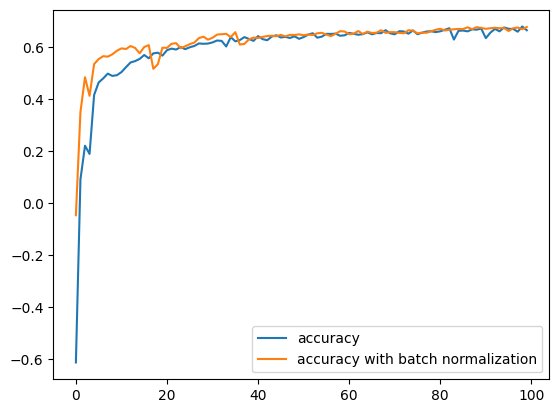

In [47]:
# plot the graph of accoracy and epochs

plt.plot(hisory.history['r2_score'],label='accuracy')
plt.plot(hisory1.history['r2_score'],label='accuracy with batch normalization')
plt.legend()

# here we clearly see that accuracy is increse by applying the batch normalization   and also converge faster

